# Superposition de $\beta$-Ginibre

On superpose  
- 2 (1,0.75) Ginibre
- puis de 4 (1,0.75^2) Ginibre
- puis de 8 (1,0.75^3) Ginibre
- et enfin 16 (1,0.75^4) Ginibre

tous simulés avec 400 points au départ (méthode des valeurs propres des matrices gaussiennes)

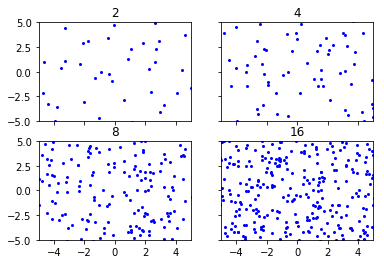

In [14]:
%matplotlib inline
from numpy import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def ginibre(n):
    r=np.random.randn(n,n)+1j*np.random.randn(n,n)
    z=np.linalg.eigvals(r)
    return real(z),imag(z)

def thinning(long,b):
    r=np.random.rand(long)
    return np.nonzero(r<=b)

def superposition(long,K,beta):
    x=[]
    y=[]
    f, axarr = plt.subplots(2, 2)
    for i in np.arange(2**K):
        a,b=ginibre(long)
        x=x+[a]
        y=y+[b]
    for i in 1+np.arange(K):        
        for j in np.arange(2**K):
            p=thinning(x[j].size,beta)
            x[j]=x[j][p]*np.sqrt(beta)
            y[j]=y[j][p]*np.sqrt(beta)
        for j in np.arange(2**i):
            axarr[(i-1)//2,(i-1)%2].axis([-5,5,-5,5])
            axarr[(i-1)//2,(i-1)%2].plot(x[j],y[j],'o',ms=2,color='blue')
        axarr[(i-1)//2,(i-1)%2].set_title(str(2**i))
    plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
    plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False) 
    
    #plt.show()
    plt.savefig('superposition.pdf')
    
superposition(800,4,0.5)


#plt.tight_layout()
#plt.show()